In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(DESeq2)
library(DiffBind)
library(tidyr)
library(wesanderson)
library(viridis)
library(gplots)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter,

In [2]:
setwd("/lustre1/project/stg_00041/Irene/ATAC_analysis/Allelic_ATAC/X_to_A_allelic_ratio/")

In [3]:
df_allelic_full <- read.delim("df_allelic_full.txt")

In [4]:
head(df_allelic_full)

seqnames,start,end,width,strand,Day0_M,Day0_C,Day8_M,Day8_C,Day9_M,Day9_C,Day10_M,Day10_C,Day12_M,Day12_C,iPSCs_M,iPSCs_C
1,3046042,3046267,226,*,1,1,1,1,7,1,2,1,5,1,1,2
1,3046446,3046917,472,*,1,1,21,12,16,9,13,9,3,4,1,2
1,3215905,3216127,223,*,1,3,2,1,1,2,5,1,4,2,1,1
1,3250793,3251095,303,*,1,1,1,1,1,1,1,5,1,3,5,2
1,3251341,3251716,376,*,1,1,3,1,2,1,1,4,3,1,5,1
1,3285287,3285526,240,*,2,2,1,6,1,1,1,1,1,1,4,1


In [5]:
names(df_allelic_full)[names(df_allelic_full) == 'seqnames'] <- 'chr'

In [6]:
head(df_allelic_full)

chr,start,end,width,strand,Day0_M,Day0_C,Day8_M,Day8_C,Day9_M,Day9_C,Day10_M,Day10_C,Day12_M,Day12_C,iPSCs_M,iPSCs_C
1,3046042,3046267,226,*,1,1,1,1,7,1,2,1,5,1,1,2
1,3046446,3046917,472,*,1,1,21,12,16,9,13,9,3,4,1,2
1,3215905,3216127,223,*,1,3,2,1,1,2,5,1,4,2,1,1
1,3250793,3251095,303,*,1,1,1,1,1,1,1,5,1,3,5,2
1,3251341,3251716,376,*,1,1,3,1,2,1,1,4,3,1,5,1
1,3285287,3285526,240,*,2,2,1,6,1,1,1,1,1,1,4,1


In [7]:
df_allelic_full$names <- 1:nrow(df_allelic_full) 

In [8]:
head(df_allelic_full)

chr,start,end,width,strand,Day0_M,Day0_C,Day8_M,Day8_C,Day9_M,Day9_C,Day10_M,Day10_C,Day12_M,Day12_C,iPSCs_M,iPSCs_C,names
1,3046042,3046267,226,*,1,1,1,1,7,1,2,1,5,1,1,2,1
1,3046446,3046917,472,*,1,1,21,12,16,9,13,9,3,4,1,2,2
1,3215905,3216127,223,*,1,3,2,1,1,2,5,1,4,2,1,1,3
1,3250793,3251095,303,*,1,1,1,1,1,1,1,5,1,3,5,2,4
1,3251341,3251716,376,*,1,1,3,1,2,1,1,4,3,1,5,1,5
1,3285287,3285526,240,*,2,2,1,6,1,1,1,1,1,1,4,1,6


In [9]:
variables <- c("chr", "names", "width", "Day0_M", "Day8_M", "Day9_M", "Day10_M", "Day12_M", "iPSCs_M", "Day0_C", "Day8_C", "Day9_C", "Day10_C", "Day12_C", "iPSCs_C")

In [10]:
df_allelic_full <- df_allelic_full[variables]

In [11]:
head(df_allelic_full)

chr,names,width,Day0_M,Day8_M,Day9_M,Day10_M,Day12_M,iPSCs_M,Day0_C,Day8_C,Day9_C,Day10_C,Day12_C,iPSCs_C
1,1,226,1,1,7,2,5,1,1,1,1,1,1,2
1,2,472,1,21,16,13,3,1,1,12,9,9,4,2
1,3,223,1,2,1,5,4,1,3,1,2,1,2,1
1,4,303,1,1,1,1,1,5,1,1,1,5,3,2
1,5,376,1,3,2,1,3,5,1,1,1,4,1,1
1,6,240,2,1,1,1,1,4,2,6,1,1,1,1


In [12]:
nrow(df_allelic_full)

[1] 408372

In [13]:
df_allelic_full_gathered <- gather(df_allelic_full, sample_allele, count, -chr, -names, -width)

In [14]:
df_allelic_full_gathered <- separate(data = df_allelic_full_gathered, col = sample_allele, into = c("sample", "allele"), sep = "_")

In [15]:
head(df_allelic_full_gathered)

chr,names,width,sample,allele,count
1,1,226,Day0,M,1
1,2,472,Day0,M,1
1,3,223,Day0,M,1
1,4,303,Day0,M,1
1,5,376,Day0,M,1
1,6,240,Day0,M,2


In [16]:
df_allelic_full_gathered <- spread(df_allelic_full_gathered, allele, count)

In [17]:
head(df_allelic_full_gathered)

chr,names,width,sample,C,M
1,1,226,Day0,1,1
1,2,472,Day0,1,1
1,3,223,Day0,3,1
1,4,303,Day0,1,1
1,5,376,Day0,1,1
1,6,240,Day0,2,2


In [18]:
df_allelic_full_gathered$sample <- factor(df_allelic_full_gathered$sample, levels=c('Day0', 'Day8', 'Day9', 'Day10', 'Day12', 'iPSCs'))

In [19]:
df_allelic_full_gathered <- df_allelic_full_gathered %>% arrange(chr, names, sample)

In [20]:
head(df_allelic_full_gathered)

chr,names,width,sample,C,M
1,1,226,Day0,1,1
1,1,226,Day8,1,1
1,1,226,Day9,1,7
1,1,226,Day10,1,2
1,1,226,Day12,1,5
1,1,226,iPSCs,2,1


In [21]:
df_allelic_full_gathered$sumR <- df_allelic_full_gathered$C + df_allelic_full_gathered$M

In [22]:
head(df_allelic_full_gathered)

chr,names,width,sample,C,M,sumR
1,1,226,Day0,1,1,2
1,1,226,Day8,1,1,2
1,1,226,Day9,1,7,8
1,1,226,Day10,1,2,3
1,1,226,Day12,1,5,6
1,1,226,iPSCs,2,1,3


In [23]:
nrow(df_allelic_full_gathered)

[1] 2450232

In [24]:
count_samples <- df_allelic_full_gathered %>% group_by(sample) %>% summarise(total_reads = sum(sumR))
df_allelic_full_gathered <- merge(df_allelic_full_gathered, count_samples, by = "sample")

In [25]:
head(df_allelic_full_gathered)

sample,chr,names,width,C,M,sumR,total_reads
Day0,1,1,226,1,1,2,11348313
Day0,17,177148,239,1,1,2,11348313
Day0,10,44288,278,23,21,44,11348313
Day0,9,398582,342,1,6,7,11348313
Day0,4,265722,459,63,45,108,11348313
Day0,14,132862,425,5,1,6,11348313


In [26]:
df_allelic_full_gathered$mus_norm <- log1p((df_allelic_full_gathered$M/df_allelic_full_gathered$total_reads)*10000)
df_allelic_full_gathered$cast_norm <- log1p((df_allelic_full_gathered$C/df_allelic_full_gathered$total_reads)*10000)

In [27]:
head(df_allelic_full_gathered)

sample,chr,names,width,C,M,sumR,total_reads,mus_norm,cast_norm
Day0,1,1,226,1,1,2,11348313,0.0008808002,0.0008808002
Day0,17,177148,239,1,1,2,11348313,0.0008808002,0.0008808002
Day0,10,44288,278,23,21,44,11348313,0.0183358198,0.0200646808
Day0,9,398582,342,1,6,7,11348313,0.0052732017,0.0008808002
Day0,4,265722,459,63,45,108,11348313,0.0388874566,0.0540286662
Day0,14,132862,425,5,1,6,11348313,0.0008808002,0.0043962635


Filter for X chromosome and equal to or more than 10 reads between cast and mus

In [129]:
class(df_allelic_full_gathered)

[1] "data.frame"

In [130]:
nrow(df_allelic_full_gathered)

[1] 2450232

In [28]:
X_10reads <- df_allelic_full_gathered[ which(df_allelic_full_gathered$chr=='X' & df_allelic_full_gathered$sumR >= 10),]
Auto_10reads <- df_allelic_full_gathered[ which(df_allelic_full_gathered$chr!= "X" & df_allelic_full_gathered$chr!= "Y" & df_allelic_full_gathered$chr!= "MT" & df_allelic_full_gathered$sumR >= 10),]

In [29]:
head(X_10reads)

,sample,chr,names,width,C,M,sumR,total_reads,mus_norm,cast_norm
14284,Day0,X,400962,244,10,1,11,11348313,0.0008808002,0.008773284
14308,Day0,X,400966,414,34,11,45,11348313,0.0096463943,0.029520355
14314,Day0,X,400967,672,10,1,11,11348313,0.0008808002,0.008773284
14320,Day0,X,400968,401,9,1,10,11348313,0.0008808002,0.007899412
14338,Day0,X,400971,404,59,1,60,11348313,0.0008808002,0.050683710
14362,Day0,X,400975,313,22,1,23,11348313,0.0008808002,0.019200624


In [134]:
#write.table(X_10reads, file = 'X_ordered_cast_new.txt', sep = "\t")

In [135]:
nrow(X_10reads)

[1] 17070

In [30]:
head(Auto_10reads)

,sample,chr,names,width,C,M,sumR,total_reads,mus_norm,cast_norm
3,Day0,10,44288,278,23,21,44,11348313,0.018335820,0.020064681
5,Day0,4,265722,459,63,45,108,11348313,0.038887457,0.054028666
10,Day0,9,398583,422,2,8,10,11348313,0.007024774,0.001760825
11,Day0,4,265723,808,39,24,63,11348313,0.020927992,0.033789009
16,Day0,9,398584,612,61,67,128,11348313,0.057362471,0.052357587
22,Day0,9,398585,441,74,36,110,11348313,0.031230004,0.063170020


In [31]:
X_day0 <- subset(X_10reads, sample == 'Day0')

In [47]:
nrow(X_day0)

[1] 1892

In [32]:
Auto_day0 <- subset(Auto_10reads, sample == 'Day0')

In [33]:
Auto_day0$chr <- 'Auto'

In [39]:
Auto_day0_median_mus <- Auto_day0 %>%
  group_by(chr) %>%
  summarize(median=median(mus_norm))

In [40]:
Auto_day0_median_mus

chr,median
Auto,0.01139033


In [48]:
X_day0_median_mus <- X_day0 %>%
  group_by(chr) %>%
  summarize(median=median(mus_norm))

In [49]:
X_day0_median_mus

chr,median
X,0.0008808002


In [43]:
Auto_day0_median_cast <- Auto_day0 %>%
  group_by(chr) %>%
  summarize(median=median(cast_norm))

In [44]:
Auto_day0_median_cast

chr,median
Auto,0.01313123


In [50]:
X_day0_median_cast <- X_day0 %>%
  group_by(chr) %>%
  summarize(median=median(cast_norm))

In [51]:
X_day0_median_cast

chr,median
X,0.01747027


In [35]:
nrow(Auto_10reads)

[1] 1128427

In [97]:
mus_norm <- c("mus_norm", "sample")
X_mus_norm <- c("mus_norm", "sample", "chr")

In [105]:
X_mus <- X_10reads[X_mus_norm]

In [98]:
X_cast_norm <- c("cast_norm", "sample", "chr")
cast_norm <- c("cast_norm", "sample")

In [99]:
Auto_Cast <- Auto_10reads[cast_norm]

In [100]:
Auto_mus <- Auto_10reads[mus_norm]

In [101]:
Auto_mus$chr <- 'Auto'
Auto_mus$allele <- 'mus'

In [102]:
Auto_Cast$chr <- 'Auto'
Auto_Cast$allele <- 'cast'

In [103]:
names(Auto_mus)[1] <- "norm"
names(Auto_Cast)[1] <- "norm"

In [104]:
head(Auto_mus)

,norm,sample,chr,allele
3,0.018335820,Day0,Auto,mus
5,0.038887457,Day0,Auto,mus
10,0.007024774,Day0,Auto,mus
11,0.020927992,Day0,Auto,mus
16,0.057362471,Day0,Auto,mus
22,0.031230004,Day0,Auto,mus


In [111]:
head(X_mus)

,norm,sample,chr,allele
14284,0.0008808002,Day0,X,mus
14308,0.0096463943,Day0,X,mus
14314,0.0008808002,Day0,X,mus
14320,0.0008808002,Day0,X,mus
14338,0.0008808002,Day0,X,mus
14362,0.0008808002,Day0,X,mus


In [110]:
names(X_mus)[1] <- "norm"
X_mus$allele <- 'mus'

In [112]:
mus_X_Auto <- rbind(X_mus, Auto_mus)

In [113]:
head(mus_X_Auto)

,norm,sample,chr,allele
14284,0.0008808002,Day0,X,mus
14308,0.0096463943,Day0,X,mus
14314,0.0008808002,Day0,X,mus
14320,0.0008808002,Day0,X,mus
14338,0.0008808002,Day0,X,mus
14362,0.0008808002,Day0,X,mus


In [44]:
day0_M <- subset(Auto_mus, sample == 'Day0')
iPSCs_M <- subset(Auto_mus, sample == 'iPSCs')
day0_C <- subset(Auto_Cast, sample == 'Day0')
iPSCs_C <- subset(Auto_Cast, sample == 'iPSCs')

In [45]:
day0_M$sample_allele <- 'Day0_mus'
iPSCs_M$sample_allele <- 'iPSCs_mus'
day0_C$sample_allele <- 'Day0_cast'
iPSCs_C$sample_allele <- 'iPSCs_cast'

In [46]:
head(day0_M)

,norm,sample,chr,allele,sample_allele
3,0.018335820,Day0,Auto,mus,Day0_mus
5,0.038887457,Day0,Auto,mus,Day0_mus
10,0.007024774,Day0,Auto,mus,Day0_mus
11,0.020927992,Day0,Auto,mus,Day0_mus
16,0.057362471,Day0,Auto,mus,Day0_mus
22,0.031230004,Day0,Auto,mus,Day0_mus


In [47]:
mus <- rbind(day0_M, iPSCs_M)
cast <- rbind(day0_C, iPSCs_C)

In [48]:
mus_cast_auto_day0_iPSCs <- rbind(mus, cast)

In [49]:
head(mus_cast_auto_day0_iPSCs)

,norm,sample,chr,allele,sample_allele
3,0.018335820,Day0,Auto,mus,Day0_mus
5,0.038887457,Day0,Auto,mus,Day0_mus
10,0.007024774,Day0,Auto,mus,Day0_mus
11,0.020927992,Day0,Auto,mus,Day0_mus
16,0.057362471,Day0,Auto,mus,Day0_mus
22,0.031230004,Day0,Auto,mus,Day0_mus


In [50]:
mus_cast_auto_day0_iPSCs$sample_allele <- factor(mus_cast_auto_day0_iPSCs$sample_allele, levels=c('Day0_cast', 'iPSCs_cast','Day0_mus', 'iPSCs_mus'))

In [118]:
mus_X_Auto_day0$chr <- factor(mus_X_Auto_day0$chr, levels=c('X', 'Auto'))

In [117]:
mus_X_Auto_day0 <- subset(mus_X_Auto, sample == 'Day0')

In [51]:
options(repr.plot.width=6, repr.plot.height=5)
autos <- ggplot(mus_cast_auto_day0_iPSCs, aes(x=sample_allele, y=norm, fill=sample)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5) +
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("") + 
    ylab("Accessibility (autosomal regions)")+
    coord_cartesian(ylim = c(0,0.075))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

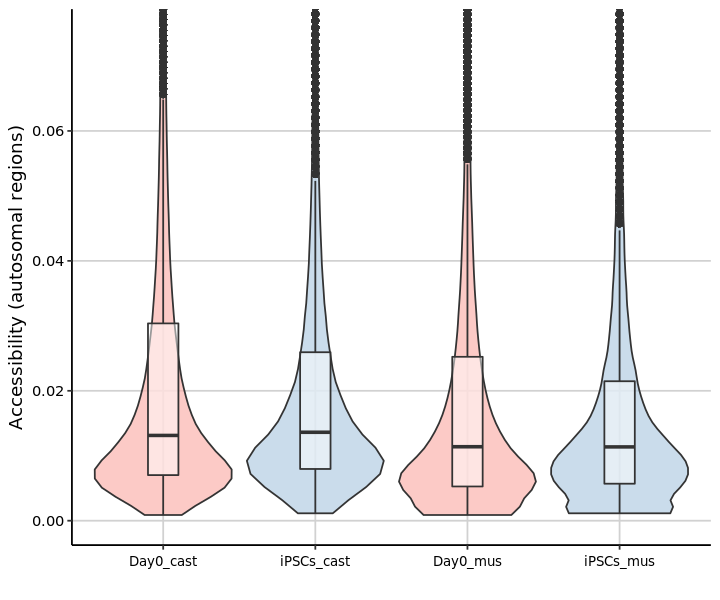

In [52]:
autos

In [53]:
ggsave("Xi_Xa_Auto_accessibility_MEFs_iPSCs.pdf", width = 6, height = 5)

In [54]:
test <- pairwise.wilcox.test(mus_cast_auto_day0_iPSCs$norm, mus_cast_auto_day0_iPSCs$sample_allele, p.adjust.method = "bonferroni")

In [55]:
test$p.value

,Day0_cast,iPSCs_cast,Day0_mus
iPSCs_cast,0.06965525,NA,NA
Day0_mus,0.00000000,0,NA
iPSCs_mus,0.00000000,0,1


In [56]:
test


	Pairwise comparisons using Wilcoxon rank sum test 

data:  mus_cast_auto_day0_iPSCs$norm and mus_cast_auto_day0_iPSCs$sample_allele 

           Day0_cast iPSCs_cast Day0_mus
iPSCs_cast 0.07      -          -       
Day0_mus   <2e-16    <2e-16     -       
iPSCs_mus  <2e-16    <2e-16     1.00    

P value adjustment method: bonferroni 

In [57]:
head(Auto_X_mus_cast)

ERROR: Error in head(Auto_X_mus_cast): object 'Auto_X_mus_cast' not found


In [ ]:
X_cast_norm <- c("chr", "cast_norm", "sample")

In [ ]:
X <- X_10reads[X_cast_norm]

In [ ]:
X_mus <- X_10reads[X_mus_norm]

In [ ]:
head(X_mus)

In [ ]:
X_ordered <- X[, c(3, 2)]

In [ ]:
head(X_ordered)

In [ ]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/Xa_Xi_dynamics/")

In [ ]:
write.table(X_ordered, file = 'X_ordered_cast.txt', sep = "\t")

In [ ]:
Auto_X <- rbind(X, Auto)

In [ ]:
Auto_X_mus <- rbind(X_mus, Auto_mus)

In [ ]:
head(Auto_X_mus)

In [ ]:
Auto_X_mus_cast$sample <- as.character(Auto_X_mus_cast$sample)

In [ ]:
day0_all <- subset(Auto_X_mus_cast, sample == 'Day0')
#day8_mus <- subset(Auto_X_mus_cast, sample == 'Day8')
#day9_mus <- subset(Auto_X_mus_cast, sample == 'Day9')
#day10_mus <- subset(Auto_X_mus_cast, sample == 'Day10')
#day12_mus <- subset(Auto_X_mus_cast, sample == 'Day12')
#iPSCs <- subset(Auto_X_mus_cast, sample == 'iPSCs')

In [92]:
head(X_10reads)

,sample,chr,names,C,M,sumR,total_reads,mus_norm,cast_norm
14284,Day0,X,400962,10,1,11,11348313,0.0008808002,0.008773284
14308,Day0,X,400966,34,11,45,11348313,0.0096463943,0.029520355
14314,Day0,X,400967,10,1,11,11348313,0.0008808002,0.008773284
14320,Day0,X,400968,9,1,10,11348313,0.0008808002,0.007899412
14338,Day0,X,400971,59,1,60,11348313,0.0008808002,0.050683710
14362,Day0,X,400975,22,1,23,11348313,0.0008808002,0.019200624


In [93]:
day0 <- subset(X_10reads, sample == 'Day0')
day8 <- subset(X_10reads, sample == 'Day8')
day9 <- subset(X_10reads, sample == 'Day9')
day10 <- subset(X_10reads, sample == 'Day10')
day12 <- subset(X_10reads, sample == 'Day12')
iPSCs <- subset(X_10reads, sample == 'iPSCs')

In [94]:
head(day0)

,sample,chr,names,C,M,sumR,total_reads,mus_norm,cast_norm
14284,Day0,X,400962,10,1,11,11348313,0.0008808002,0.008773284
14308,Day0,X,400966,34,11,45,11348313,0.0096463943,0.029520355
14314,Day0,X,400967,10,1,11,11348313,0.0008808002,0.008773284
14320,Day0,X,400968,9,1,10,11348313,0.0008808002,0.007899412
14338,Day0,X,400971,59,1,60,11348313,0.0008808002,0.050683710
14362,Day0,X,400975,22,1,23,11348313,0.0008808002,0.019200624


In [96]:
nrow(day0)
nrow(day8)
nrow(day9)
nrow(day10)
nrow(day12)
nrow(iPSCs)

[1] 1892

[1] 2403

[1] 2805

[1] 2622

[1] 3210

[1] 4138

In [ ]:
day0_iPSCs <- rbind(day0, iPSCs)

In [ ]:
head(day0_iPSCs)

In [ ]:
day0_iPSCs$sample <- factor(day0_iPSCs$sample, levels=c('Day0', 'iPSCs'))
#day8_mus$chr <- factor(day8_mus$chr, levels=c('X', 'Auto'))
#day9_mus$chr <- factor(day9_mus$chr, levels=c('X', 'Auto'))
#day10_mus$chr <- factor(day10_mus$chr, levels=c('X', 'Auto'))
#day12_mus$chr <- factor(day12_mus$chr, levels=c('X', 'Auto'))
#iPSCs_mus$chr <- factor(iPSCs_mus$chr, levels=c('X', 'Auto'))

In [ ]:
head(day0_iPSCs)

In [ ]:
head(median_day0_mus)

In [ ]:
median_iPSCs_mus <- iPSCs_mus %>%
  group_by(chr) %>%
  summarize(median=median(mus_norm))

In [ ]:
median_day0_mus <- day0_mus %>%
  group_by(chr) %>%
  summarize(median=median(mus_norm))

In [ ]:
#pairwise.wilcox.test((iPSCs$cast_norm, iPSCs$chr,  p.adjust.method = "bonferroni")

In [ ]:
res <- pairwise.wilcox.test(day0_mus$mus_norm, day0_mus$chr)

In [ ]:
p.adjust.method = "bonferroni"

In [ ]:
res$p.value

In [ ]:
options(repr.plot.width=4, repr.plot.height=5)
day0_X_Auto_access <- ggplot(day0, aes(x=chr, y=cast_norm, fill=sample)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5) +
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("") + 
    ylab("Xa and Auto accessibility in MEFs")+
    coord_cartesian(ylim = c(0,0.075))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

In [ ]:
head(iPSCs)

In [119]:
options(repr.plot.width=4, repr.plot.height=5)
day0_mus <- ggplot(mus_X_Auto_day0, aes(x=chr, y=norm, fill=sample)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5) +
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("") + 
    ylab("Xi and Auto accessibility in MEFs")+
    coord_cartesian(ylim = c(0,0.075))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

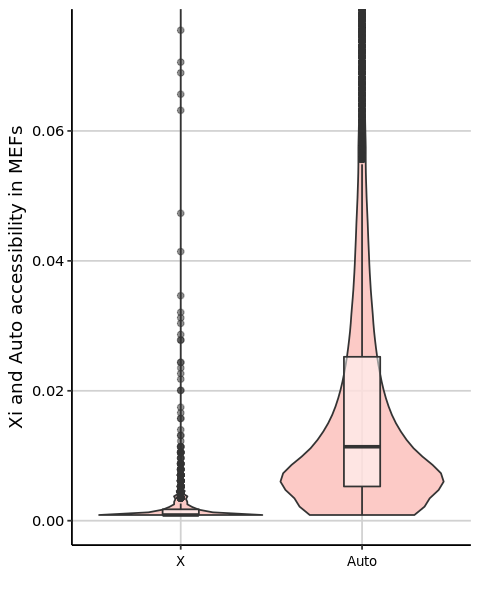

In [120]:
day0_mus

In [133]:
test_Xi <- pairwise.wilcox.test(mus_X_Auto_day0$norm, mus_X_Auto_day0$chr)

In [135]:
test_Xi


	Pairwise comparisons using Wilcoxon rank sum test 

data:  mus_X_Auto_day0$norm and mus_X_Auto_day0$chr 

     X     
Auto <2e-16

P value adjustment method: holm 

In [ ]:
ggsave("Xi_Auto_accessibility_MEFs.pdf", width = 4, height = 5)

In [ ]:
day0_X_Auto_access

In [ ]:
ggsave("Xa_Auto_accessibility_MEFs.pdf", width = 4, height = 5)

In [ ]:

options(repr.plot.width=5, repr.plot.height=2.5)
iPSCs_new <- ggplot(iPSCs, aes(x=cast_norm, color=chr)) +
  geom_density()+


geom_vline(data=median_iPSCs, aes(xintercept=median, colour=chr), linetype="dashed", size= 1) +


 theme(plot.title = element_text(size=6))+
    xlab("normalized accessibility") + 
    ylab("Regions (density)")+
   # coord_cartesian(ylim = c(0,4))+
    coord_cartesian(xlim = c(0,0.1))+
scale_x_continuous(expand = c(0, 0)) + 
scale_y_continuous(expand = c(0, 0))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
theme_classic()+   
theme(legend.title=element_blank())

 

In [ ]:
iPSCs_new

In [ ]:
ggsave("iPSCs_X_Auto_density.pdf", width = 5, height = 2.5)

In [ ]:
options(repr.plot.width=5, repr.plot.height=2.5)
da0_new <- ggplot(day0, aes(x=cast_norm, color=chr)) +
  geom_density()+


geom_vline(data=median_day0, aes(xintercept=median, colour=chr), linetype="dashed", size= 1) +


 theme(plot.title = element_text(size=6))+
    xlab("normalized accessibility") + 
    ylab("Regions (density)")+
   # coord_cartesian(ylim = c(0,4))+
    coord_cartesian(xlim = c(0,0.1))+
scale_x_continuous(expand = c(0, 0)) + 
scale_y_continuous(expand = c(0, 0))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
theme_classic()+   
theme(legend.title=element_blank())


In [ ]:
da0_new

In [ ]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/Xa_Xi_dynamics/")

In [ ]:
ggsave("day0_X_Auto_density.pdf", width = 5, height = 2.5)

In [ ]:
median <- Auto_10reads %>% group_by(sample) %>% summarise(median_auto_cast = median(cast_norm))
X_10reads <- merge(X_10reads, median, by = "sample")

In [ ]:
head(X_10reads)

In [ ]:
X_10reads$x_to_auto_ratio <- X_10reads$cast_norm/X_10reads$median_auto_cast

In [ ]:
head(X_10reads)

In [ ]:
options(repr.plot.width=6, repr.plot.height=4)
X_to_Auto_Cast_ATAC <- ggplot(X_10reads, aes(x=sample, y=x_to_auto_ratio, fill=sample)) + 
  
geom_violin(scale = "width", alpha = 1, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.3, fill="white", alpha = 0.5) +
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+
    xlab("") + 
    ylab("X to Auto ratio on the Xa")+
    coord_cartesian(ylim = c(0,4))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

In [ ]:
X_to_Auto_Cast_ATAC

In [ ]:
ggsave("X_to_Auto_ATAC_Xa.pdf", width = 6, height = 4)

In [ ]:
res2 <- pairwise.wilcox.test(X_10reads$x_to_auto_ratio, X_10reads$sample, p.adjust.method = "bonferroni")

In [45]:
res2$p.value

ERROR: Error in eval(expr, envir, enclos): object 'res2' not found


## statistics for absolute value:

In [52]:
res3 <- pairwise.wilcox.test(X_10reads$cast_norm, X_10reads$sample, p.adjust.method = "bonferroni")
res4 <- pairwise.wilcox.test(X_10reads$cast_norm, X_10reads$sample)

In [53]:
print(res3$p.value)
print(res4$p.value)

              Day0         Day8       Day9      Day10 Day12
Day8  6.388799e-11           NA         NA         NA    NA
Day9  1.068931e-27 1.818413e-03         NA         NA    NA
Day10 9.580518e-20 1.527274e-04 1.00000000         NA    NA
Day12 2.127639e-40 4.545017e-08 0.42134377 0.30596362    NA
iPSCs 4.771424e-42 5.493885e-11 0.01554911 0.03653565     1
              Day0         Day8        Day9      Day10     Day12
Day8  4.259199e-11           NA          NA         NA        NA
Day9  9.264072e-28 8.485928e-04          NA         NA        NA
Day10 7.664415e-20 8.145459e-05 0.856845637         NA        NA
Day12 1.985796e-40 2.727010e-08 0.084268755 0.08159030        NA
iPSCs 4.771424e-42 4.028849e-11 0.006219646 0.01217855 0.5434164


In [283]:
library(repr)
library(RColorBrewer)

In [284]:
options(repr.plot.width=6, repr.plot.height=4)
Absolute_XCast_ATAC <- ggplot(X_10reads, aes(x=sample, y=cast_norm, fill=sample)) + 
  
geom_violin(scale = "width", alpha = 1, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.3, fill="white", alpha = 0.5) +
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+
    xlab("") + 
    ylab("Absolute normalized accessibility on the Xa")+
    coord_cartesian(ylim = c(0,0.04))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

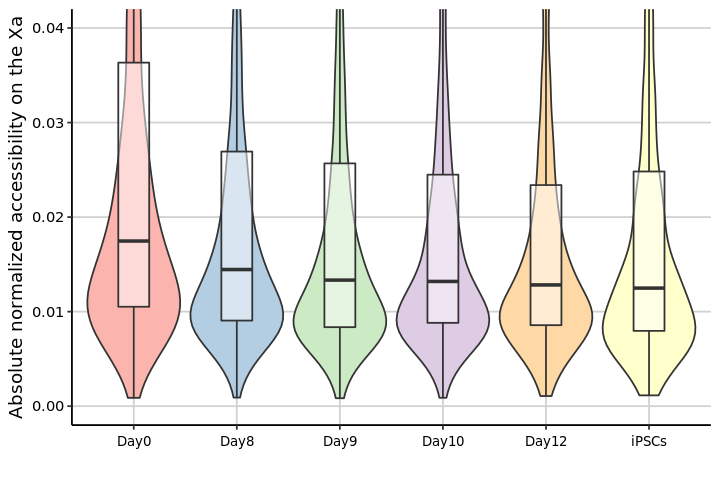

In [285]:
Absolute_XCast_ATAC

In [286]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/Xa_Xi_dynamics/")

In [287]:
ggsave("abs_norm_ATAC_Xa.pdf", width = 6, height = 4)